# Работа с текстом на естественном языке.


Пример работы word2vec

In [ ]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

#lang_model = api.load("glove-twitter-25")
lang_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# king + (woman - man)
lang_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [ ]:
lang_model.most_similar(positive=['russia', 'paris'], negative=['moscow'], topn=10)

[('france', 0.8784568905830383),
 ('french', 0.6961610913276672),
 ('britain', 0.6948201656341553),
 ('europe', 0.6841812133789062),
 ('belgium', 0.6787702441215515),
 ('spain', 0.6482120752334595),
 ('switzerland', 0.643441379070282),
 ('italy', 0.6415969729423523),
 ('germany', 0.636298656463623),
 ('prohertrib', 0.6314049363136292)]

Сентиментальный анализ текста

In [ ]:
import pandas as pd
import numpy as np

sentiment_ds = pd.read_csv('https://raw.githubusercontent.com/WiMLDS/election-data-hackathon/master/first-gop-debate-twitter-sentiment/data/Sentiment.csv')

In [ ]:
sentiment_small = sentiment_ds[['sentiment', 'text']]
sentiment_small.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [ ]:
pos_neg_sentiment = sentiment_small[sentiment_small.sentiment != 'Neutral']
pos_neg_sentiment.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


In [ ]:
from pandas.api.types import CategoricalDtype

clean_sentiment_ds = pos_neg_sentiment.copy()
clean_sentiment_ds.sentiment = clean_sentiment_ds.sentiment.astype(CategoricalDtype(categories = ['Negative', 'Positive'], ordered=True)).cat.codes
clean_sentiment_ds.head()

,sentiment,text
1,1,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,1,RT @RobGeorge: That Carly Fiorina is trending ...
4,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,1,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,0,RT @warriorwoman91: I liked her and was happy ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


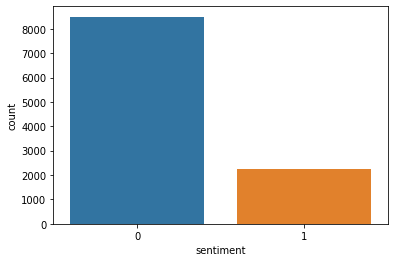

In [ ]:
import seaborn as sns

sns.countplot(clean_sentiment_ds['sentiment'])

In [ ]:
import re
clean_sentiment_ds['text'] = clean_sentiment_ds['text'].apply(lambda x: x.lower())

In [ ]:
clean_sentiment_ds.head()

,sentiment,text
1,1,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,1,RT @RobGeorge: That Carly Fiorina is trending ...
4,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,1,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,0,RT @warriorwoman91: I liked her and was happy ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = clean_sentiment_ds['text']
sentiment = clean_sentiment_ds['sentiment']

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None, sublinear_tf=True, ngram_range=(1, 1))
embeddings = vectorizer.fit_transform(corpus)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, sentiment, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, plot_confusion_matrix, classification_report

In [ ]:
model = LogisticRegression(penalty='l2', C=0.3, solver='lbfgs', max_iter=150, verbose=0, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.3, max_iter=150, random_state=42)

In [ ]:
print(classification_report(y_test, model.predict(X_test), zero_division='warn'))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1713
           1       0.67      0.54      0.60       433

    accuracy                           0.85      2146
   macro avg       0.78      0.74      0.75      2146
weighted avg       0.84      0.85      0.85      2146



1. Улучшить показатели precision, recall по 1.
2. Применить другие методы машинного обучения и сравнить результат.